In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('Cars.csv')



In [3]:
print(df.shape)


(398, 9)


In [4]:
print(df.columns)


Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')


In [5]:
df.set_index('name', inplace=True)



In [7]:
print(df['mpg'].unique())


[18.  15.  16.  17.  14.  24.  22.  21.  27.  26.  25.  10.  11.   9.
 28.  19.  12.  13.  23.  30.  31.  35.  20.  29.  32.  33.  17.5 15.5
 14.5 22.5 24.5 18.5 29.5 26.5 16.5 31.5 36.  25.5 33.5 20.5 30.5 21.5
 43.1 36.1 32.8 39.4 19.9 19.4 20.2 19.2 25.1 20.6 20.8 18.6 18.1 17.7
 27.5 27.2 30.9 21.1 23.2 23.8 23.9 20.3 21.6 16.2 19.8 22.3 17.6 18.2
 16.9 31.9 34.1 35.7 27.4 25.4 34.2 34.5 31.8 37.3 28.4 28.8 26.8 41.5
 38.1 32.1 37.2 26.4 24.3 19.1 34.3 29.8 31.3 37.  32.2 46.6 27.9 40.8
 44.3 43.4 36.4 44.6 40.9 33.8 32.7 23.7 23.6 32.4 26.6 25.8 23.5 39.1
 39.  35.1 32.3 37.7 34.7 34.4 29.9 33.7 32.9 31.6 28.1 30.7 24.2 22.4
 34.  38.  44. ]


In [40]:
df['hp_by_weight'] = df['horsepower'] / df['weight']
df.set_index('hp_by_weight', inplace=True)


In [9]:
df.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
hp_by_weight,,,,,,,,
0.037100,18.0,8,307.0,130.0,3504,12.0,70,usa
0.044679,15.0,8,350.0,165.0,3693,11.5,70,usa
0.043655,18.0,8,318.0,150.0,3436,11.0,70,usa
0.043694,16.0,8,304.0,150.0,3433,12.0,70,usa
0.040591,17.0,8,302.0,140.0,3449,10.5,70,usa


In [41]:
df.columns


Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [42]:
max_hp = df['horsepower'].max()
car_name = df[df['horsepower'] == max_hp]['name'].values[0]
print(car_name)


pontiac grand prix


In [32]:
count_mpg_35 = (df['mpg'] >= 35).sum()
print(count_mpg_35)


36


In [33]:
common_origin = df[(df['horsepower'] > 100) & (df['weight'] < 3000)]['origin'].mode()[0]
print(common_origin)


1


In [34]:
mean_accel_japan = round(df[df['origin'] == 3]['acceleration'].mean(), 2)
print(mean_accel_japan)


16.17


In [35]:
year_highest_avg_mpg = df.groupby('model_year')['mpg'].mean().idxmax()
print(year_highest_avg_mpg)


80


In [36]:
median_mpg = df['mpg'].median()
filtered_df = df[df['mpg'] > median_mpg].copy()
filtered_df['hp_to_weight'] = filtered_df['horsepower'] / filtered_df['weight']
best_ratio = filtered_df['hp_to_weight'].max()
best_cars = filtered_df[filtered_df['hp_to_weight'] == best_ratio]['name'].tolist()
print(best_cars)


['bmw 2002']


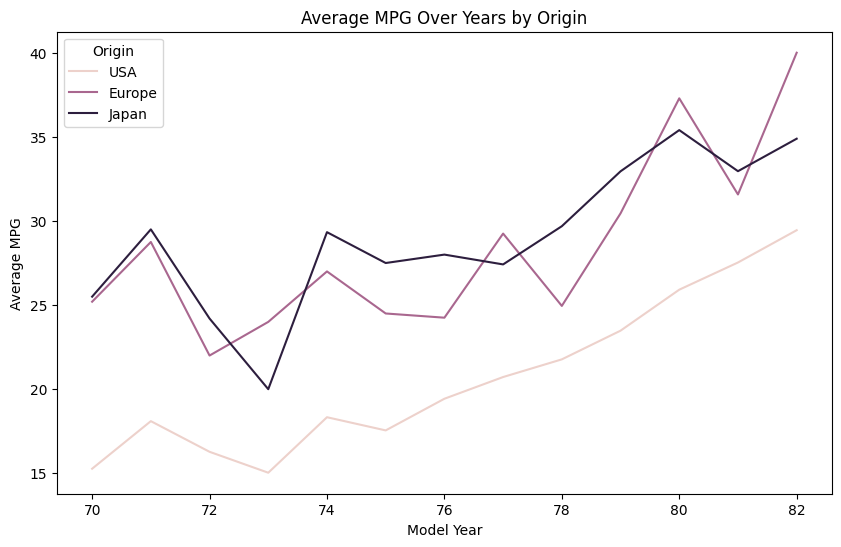

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='model_year', y='mpg', hue='origin', estimator='mean', errorbar=None)
plt.title('Average MPG Over Years by Origin')
plt.xlabel('Model Year')
plt.ylabel('Average MPG')
plt.legend(title='Origin', labels=['USA', 'Europe', 'Japan'])
plt.show()



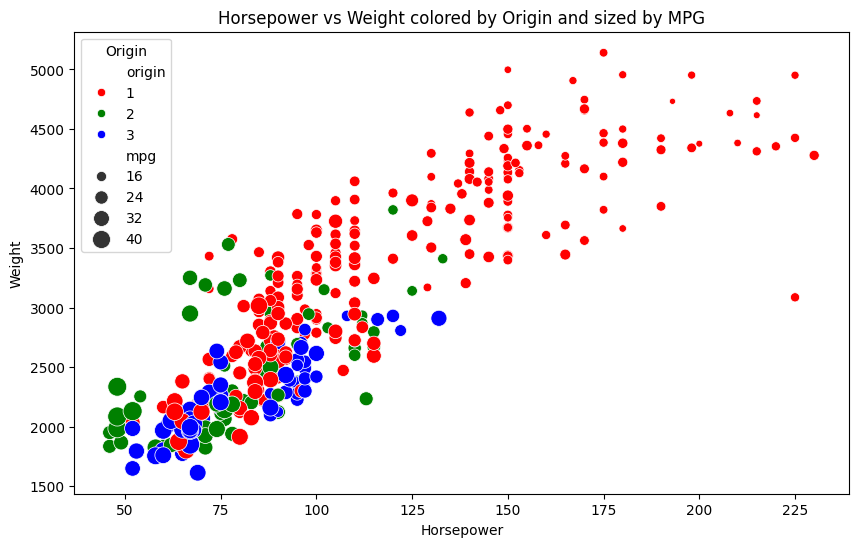

In [38]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='horsepower', y='weight', hue='origin', size='mpg',
                hue_order=[1, 2, 3], palette=['red', 'green', 'blue'], sizes=(20, 200))
plt.title('Horsepower vs Weight colored by Origin and sized by MPG')
plt.xlabel('Horsepower')
plt.ylabel('Weight')
plt.legend(title='Origin')
plt.show()
